# Neural Network Modeling and hyperparameter tuning




In [2]:
import pandas as pd
import plotly
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import timeit
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings(action='once')

In [3]:
df = pd.read_csv('../Data/CC_Feature_engineered.csv')

predictor_list = pd.read_pickle(r'../Data/predictor_list')

In [88]:
print(predictor_list)

['education_level_ 9th', 'occupation_ Priv-house-serv', 'asset_code_19.0', 'education_level_ 7th-8th', 'account_type_high_approval', 'asset_code_4.0', 'education_level_ HS-grad', 'occupation_ Craft-repair', 'education_level_ 12th', 'relationship_ Husband', 'occupation_ Transport-moving', 'education_level_ 5th-6th', 'education_level_ 10th', 'asset_code_2.0', 'education_level_ Assoc-voc', 'education_level_ Some-college', 'portfolio_type_I', 'relationship_ Unmarried', 'portfolio_type_R', 'institution_PVT', 'age_group_older_age', 'asset_code_1.0', 'education_level_ Assoc-acdm', 'portfolio_type_M', 'institution_BRO', 'workclass_ Private', 'education_level_ 11th', 'occupation_ Adm-clerical', 'education_level_ Bachelors', 'age_group_young', 'occupation_ Sales', 'workclass_ Self-emp-inc', 'workclass_ State-gov', 'education_level_ Masters', 'occupation_ Protective-serv', 'workclass_ Local-gov', 'relationship_ Not-in-family', 'hours_per_week', 'occupation_ Machine-op-inspct', 'education_level_ P

In [89]:
df.describe()

,education_num,hours_per_week,approved,married,hours,capital_net,inquiry,institution_BRO,institution_PVT,account_type_high_approval,...,occupation_ Tech-support,occupation_ Transport-moving,asset_code_1.0,asset_code_2.0,asset_code_4.0,asset_code_19.0,portfolio_type_F,portfolio_type_I,portfolio_type_M,portfolio_type_R
count,43843.000000,43843.000000,43843.000000,43843.000000,43843.000000,43843.000000,43843.000000,43843.000000,43843.000000,43843.000000,...,43843.000000,43843.000000,43843.000000,43843.000000,43843.000000,43843.000000,43843.000000,43843.000000,43843.000000,43843.000000
mean,10.120202,40.940675,0.249869,0.467669,0.777182,557.719499,0.360765,0.006911,0.580731,0.001163,...,0.031544,0.051411,0.968342,0.025933,0.004379,0.001346,0.000342,0.382296,0.025204,0.592158
std,2.555691,12.014723,0.432942,0.498959,0.416142,2601.498611,0.480228,0.082846,0.493445,0.034087,...,0.174786,0.220837,0.175091,0.158939,0.066032,0.036660,0.018494,0.485954,0.156745,0.491439
min,1.000000,1.000000,0.000000,0.000000,0.000000,-4356.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,40.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.000000,40.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,13.000000,45.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,16.000000,99.000000,1.000000,1.000000,1.000000,15024.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [90]:
df.dtypes

user_id              object
education_num       float64
hours_per_week      float64
approved              int64
married               int64
                     ...   
asset_code_19.0       int64
portfolio_type_F      int64
portfolio_type_I      int64
portfolio_type_M      int64
portfolio_type_R      int64
Length: 69, dtype: object

In [91]:
df.columns

Index(['user_id', 'education_num', 'hours_per_week', 'approved', 'married',
       'hours', 'capital_net', 'inquiry', 'institution_BRO', 'institution_PVT',
       'account_type_high_approval', 'account_type_mid_approval',
       'gender_ Female', 'gender_ Male', 'age_group_mid_age',
       'age_group_minor or senior', 'age_group_older_age', 'age_group_young',
       'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay',
       'education_level_ 10th', 'education_level_ 11th',
       'education_level_ 12th', 'education_level_ 1st-4th',
       'education_level_ 5th-6th', 'education_level_ 7th-8th',
       'education_level_ 9th', 'education_level_ Assoc-acdm',
       'education_level_ Assoc-voc', 'education_level_ Bachelors',
       'education_level_ Doctorate', 'education_level_ HS-grad',
       'education_level_ Masters', 'education_level_ Preschool'

In [152]:
df1 = df.sample(10000, random_state = 2)

X_train, X_final_test = train_test_split(df1,test_size=0.2, random_state= 2)
X_final_test.to_csv('../Data/testing_dataset.csv', index = False)
## within the training dataset, split the data into training dataset and testing/validation dataset
X_train, X_test = train_test_split(X_train,test_size=0.2, random_state= 2)
print('records in training dataset')
print(len(X_train))
print('records in validation dataset')
print(len(X_test))
print('records in final testing dataset')
print(len(X_final_test))

records in training dataset
6400
records in validation dataset
1600
records in final testing dataset
2000


In [93]:
predictors = predictor_list
target = 'approved'


In [155]:
def modelfit(estimator,data_train,data_test,predictors,target):
    start = timeit.default_timer()
    #fitting model
    estimator.fit(data_train[predictors],data_train.loc[:,target])
    #train data prediction
    start1 = timeit.default_timer()
    train_pred=estimator.predict(data_train[predictors])
    stop1 = timeit.default_timer()
    #cross_validation score
    cv_score=cross_val_score(estimator,data_train[predictors],data_train.loc[:,target],cv=5,scoring='precision')

    #Print model report:
    print ("\nModel Report")
    print ("Accuracy on Train Data: %.4g" % metrics.accuracy_score(data_train.loc[:,target].values, train_pred))
    print ("Precision on Train Data: %.4g" % metrics.precision_score(data_train.loc[:,target].values, train_pred))
    print ("Recall on Train Data: %.4g" % metrics.recall_score(data_train.loc[:,target].values, train_pred))
    print ("F1 score on Train Data: %.4g" % metrics.f1_score(data_train.loc[:,target].values, train_pred))
    
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    start2 = timeit.default_timer()
    test_pred=estimator.predict(data_test[predictors])
    stop2 = timeit.default_timer()
    print ("Accuracy on Test Data: %.4g" % metrics.accuracy_score(data_test.loc[:,target].values, test_pred))  
    print ("Precision on Test Data: %.4g" % metrics.precision_score(data_test.loc[:,target].values, test_pred)) 
    print ("Recall on Test Data: %.4g" % metrics.recall_score(data_test.loc[:,target].values, test_pred)) 
    print ("F1 score on Test Data: %.4g" % metrics.f1_score(data_test.loc[:,target].values, test_pred)) 
    stop = timeit.default_timer()
    print('Total Time: ', stop - start)
    print('training time: ', stop1 - start1)
    print('testing time: ', stop2 - start2)
    return test_pred


In [120]:
X_test.approved.value_counts(normalize =True)

0    0.74875
1    0.25125
Name: approved, dtype: float64

## Helper functions

In [11]:
## create learning curve ploting function

from sklearn.model_selection import learning_curve
##learning curve
# Obtain scores from learning curve function
# cv is the number of folds while performing Cross Validation
def plot_learning_curve(alg, X, y, scoring_metric, algorithm_name):
    sizes, training_scores, testing_scores = learning_curve(alg, X, y, cv=5, scoring= scoring_metric, train_sizes=np.linspace(0.01, 1.0, 30))

    # Mean and Standard Deviation of training scores
    mean_training = np.mean(training_scores, axis=1)
    Standard_Deviation_training = np.std(training_scores, axis=1)

    # Mean and Standard Deviation of testing scores
    mean_testing = np.mean(testing_scores, axis=1)
    Standard_Deviation_testing = np.std(testing_scores, axis=1)

    # dotted blue line is for training scores and green line is for cross-validation score
    plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
    plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")

    # Drawing plot
    plt.title("LEARNING CURVE FOR %s" % algorithm_name)
    plt.xlabel("Training Set Size"), plt.ylabel("%s Score" % scoring_metric), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()
    return

In [12]:
# create validation curve ploting function


 
# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
def plot_validation_curve(alg,X, y, param_name, parameter_range, scoring_metric, algorithm_name):
    train_score, test_score = validation_curve(alg, X, y,
                                           param_name = param_name,
                                           param_range = parameter_range,
                                            cv = 5, scoring = scoring_metric)

    # Calculating mean and standard deviation of training score
    mean_train_score = np.mean(train_score, axis = 1)
    std_train_score = np.std(train_score, axis = 1)

    # Calculating mean and standard deviation of testing score
    mean_test_score = np.mean(test_score, axis = 1)
    std_test_score = np.std(test_score, axis = 1)

    # Plot mean accuracy scores for training and testing scores
    plt.plot(parameter_range, mean_train_score,
         label = "Training Score", color = 'b')
    plt.plot(parameter_range, mean_test_score,
       label = "Cross Validation Score", color = 'g')

    # Creating the plot
    plt.title("Validation Curve with %s" % algorithm_name)
    plt.xlabel("%s" % param_name)
    plt.ylabel("%s" % scoring_metric)
    plt.tight_layout()
    plt.legend(loc = 'best')
    plt.show()
    return

## Modeling

In [153]:
## sampling data to cut down run time 

X = X_train[predictors]
y = X_train[target]

## Neural Network

**Baseline Model**

In [156]:
## better f1 score to begin with 
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=1)
y_pred=modelfit(mlp, X_train, X_test,predictors,target)


Model Report
Accuracy on Train Data: 0.8525
Precision on Train Data: 0.7077
Recall on Train Data: 0.6844
F1 score on Train Data: 0.6959
CV Score : Mean - 0.7489 | Std - 0.02259 | Min - 0.7179 | Max - 0.7817
Accuracy on Test Data: 0.8588
Precision on Test Data: 0.7306
Recall on Test Data: 0.6709
F1 score on Test Data: 0.6995
Total Time:  3.25772697100183
training time:  0.011495001999719534
testing time:  0.0036424070058274083


**Learning curve**

/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


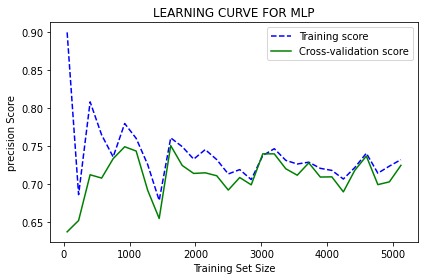

In [15]:
plot_learning_curve(mlp, X, y, 'precision', 'MLP')

In [16]:
params = mlp.get_params()
print(params)

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 1, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


**Validation curve**

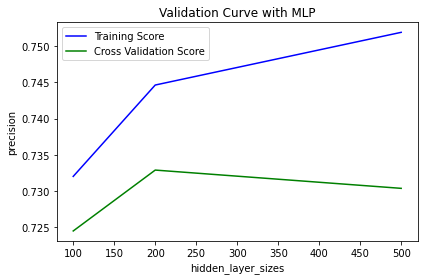

In [18]:
##number of nodes
parameter_range=[(100,),(200,),(500,)]
plot_validation_curve(mlp ,X, y, "hidden_layer_sizes", parameter_range, "precision", 'MLP')

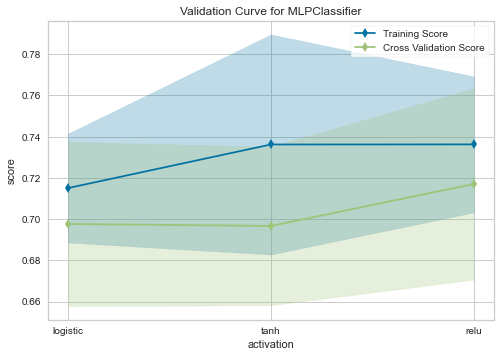

<AxesSubplot:title={'center':'Validation Curve for MLPClassifier'}, xlabel='activation', ylabel='score'>

In [19]:
##activation function
##logistic highest
from yellowbrick.model_selection import ValidationCurve


viz = ValidationCurve(
    mlp, param_name="activation",
    param_range=['logistic', 'tanh', 'relu'], cv=10, scoring="precision"
)
viz.fit(X, y)
viz.show()

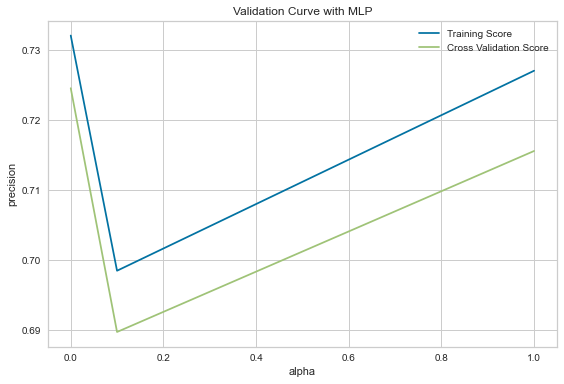

In [20]:
##regularization
## choose alpha = 0.1
parameter_range = [0.0001, 0.1, 1]
plot_validation_curve(mlp ,X, y, "alpha", parameter_range, "precision", 'MLP')

In [27]:
## number of hidden layers
param_grid = {
              'hidden_layer_sizes': [(200,100, 50), (200,100), (200,), (100,)]}
grid_lr = GridSearchCV(estimator =mlp, param_grid= param_grid, scoring='precision', 
                        refit=True, return_train_score=True) 
grid_lr.fit(X,y)
## (100,100)

GridSearchCV(estimator=MLPClassifier(random_state=1),
             param_grid={'hidden_layer_sizes': [(100, 100, 50), (100, 100),
                                                (100,), (50,)]},
             return_train_score=True, scoring='precision')

In [32]:
print(grid_lr.get_params())

{'cv': None, 'error_score': nan, 'estimator__activation': 'relu', 'estimator__alpha': 0.0001, 'estimator__batch_size': 'auto', 'estimator__beta_1': 0.9, 'estimator__beta_2': 0.999, 'estimator__early_stopping': False, 'estimator__epsilon': 1e-08, 'estimator__hidden_layer_sizes': (100,), 'estimator__learning_rate': 'constant', 'estimator__learning_rate_init': 0.001, 'estimator__max_fun': 15000, 'estimator__max_iter': 200, 'estimator__momentum': 0.9, 'estimator__n_iter_no_change': 10, 'estimator__nesterovs_momentum': True, 'estimator__power_t': 0.5, 'estimator__random_state': 1, 'estimator__shuffle': True, 'estimator__solver': 'adam', 'estimator__tol': 0.0001, 'estimator__validation_fraction': 0.1, 'estimator__verbose': False, 'estimator__warm_start': False, 'estimator': MLPClassifier(random_state=1), 'n_jobs': None, 'param_grid': {'alpha': [0.0001, 0.1], 'hidden_layer_sizes': [(100, 100, 50), (100, 100), (100,)]}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': True, 'sc

**ROC curve without hyperparamter tuning**

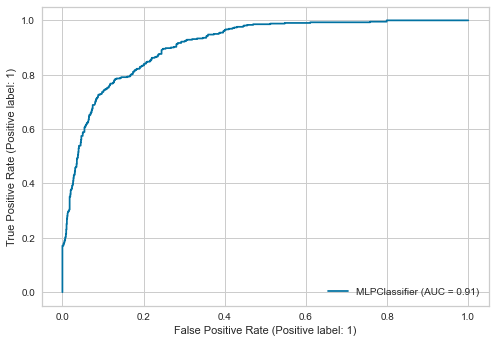

In [28]:
## ROC curve
from sklearn.metrics import confusion_matrix, classification_report, plot_roc_curve

plot_roc_curve(mlp, X_test[predictors], X_test[target])

**loss curve before hyper parameter tuning**

No handles with labels found to put in legend.


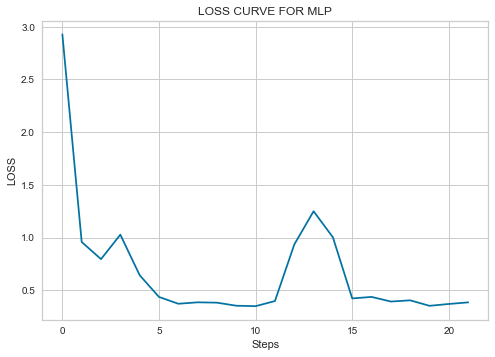

In [142]:
test_acc = metrics.precision_score(X_test[target], y_pred) * 100.
loss_values = mlp.loss_curve_
print (loss_values)
plt.plot(loss_values)
plt.title("LOSS CURVE FOR %s" % 'MLP')
plt.xlabel("Steps"), plt.ylabel('LOSS'), plt.legend(loc="best")
plt.show()

**Grid search for best hyperparameter set**

In [138]:
from sklearn.model_selection import GridSearchCV
param_grid = { 'activation': ['tanh', 'relu'],
              'alpha': [0.0001, 0.1],
              'hidden_layer_sizes': [(100,),(200,)]}
grid_lr = GridSearchCV(estimator =mlp, param_grid= param_grid, scoring='precision', 
                        refit=True, return_train_score=True) 
grid_lr.fit(X,y)

/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(estimator=MLPClassifier(random_state=1),
             param_grid={'activation': ['tanh', 'relu'], 'alpha': [0.0001, 0.1],
                         'hidden_layer_sizes': [(100,), (200,)]},
             return_train_score=True, scoring='precision')

In [139]:
print(grid_lr.best_estimator_)

print(grid_lr.best_params_)

MLPClassifier(hidden_layer_sizes=(200,), random_state=1)
{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (200,)}


**New model after hyperparameter tuning**

In [157]:
mlp_tuned = grid_lr.best_estimator_
print(mlp_tuned.get_params())

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (200,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 1, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


In [77]:
mlp = MLPClassifier(random_state=1)
print(mlp.get_params())

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 1, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


In [158]:
y_pred=modelfit(mlp_tuned, X_train, X_test,predictors,target)


Model Report
Accuracy on Train Data: 0.8577
Precision on Train Data: 0.7344
Recall on Train Data: 0.6622
F1 score on Train Data: 0.6964
CV Score : Mean - 0.7517 | Std - 0.05529 | Min - 0.6638 | Max - 0.8299
Accuracy on Test Data: 0.8638
Precision on Test Data: 0.7559
Recall on Test Data: 0.6556
F1 score on Test Data: 0.7022
Total Time:  4.354848915994808
training time:  0.016548611005418934
testing time:  0.004342533000453841


In [159]:
## compare with before hyper parameter tuning 
y_pred=modelfit(mlp, X_train, X_test,predictors,target)


Model Report
Accuracy on Train Data: 0.8525
Precision on Train Data: 0.7077
Recall on Train Data: 0.6844
F1 score on Train Data: 0.6959
CV Score : Mean - 0.7489 | Std - 0.02259 | Min - 0.7179 | Max - 0.7817
Accuracy on Test Data: 0.8588
Precision on Test Data: 0.7306
Recall on Test Data: 0.6709
F1 score on Test Data: 0.6995
Total Time:  3.6420946110010846
training time:  0.011419589005527087
testing time:  0.004027998002129607


**ROC curve after hyper parameter tuning**

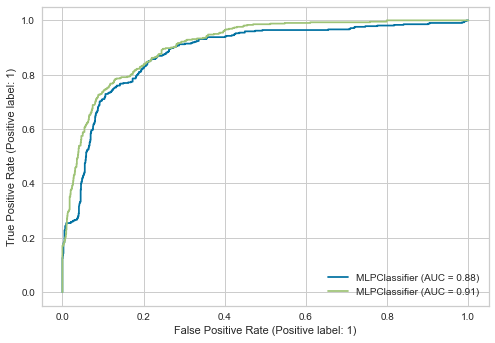

In [38]:
disp = plot_roc_curve(mlp_tuned, X_test[predictors], X_test[target])
plot_roc_curve(mlp,X_test[predictors], X_test[target], ax= disp.ax_);

**Learning curve after hyper parameter tuning** 

/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classi

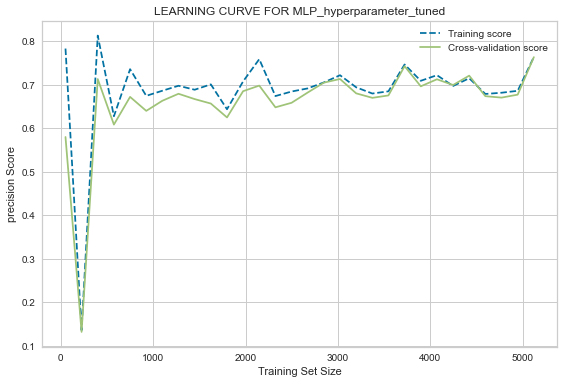

/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


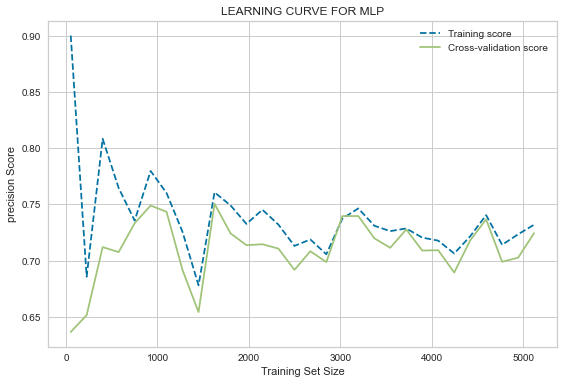

In [39]:
disp = plot_learning_curve(mlp_tuned, X, y, 'precision', 'MLP_hyperparameter_tuned')
plot_learning_curve(mlp, X, y, 'precision', 'MLP');

**loss curve after hyperparameter tuning** 

In [ ]:
test_acc = metrics.precision_score(X_test[target], y_pred) * 100.
loss_values = mlp_tuned.loss_curve_
print (loss_values)
plt.plot(loss_values)
plt.title("LOSS CURVE FOR %s" % 'MLP')
plt.xlabel("Steps"), plt.ylabel('LOSS'), plt.legend(loc="best")
plt.show()

## Final prediction results and performance 

In [160]:
y_pred=modelfit(mlp_tuned, X_train, X_final_test,predictors,target)


Model Report
Accuracy on Train Data: 0.8577
Precision on Train Data: 0.7344
Recall on Train Data: 0.6622
F1 score on Train Data: 0.6964
CV Score : Mean - 0.7517 | Std - 0.05529 | Min - 0.6638 | Max - 0.8299
Accuracy on Test Data: 0.837
Precision on Test Data: 0.7039
Recall on Test Data: 0.6119
F1 score on Test Data: 0.6547
Total Time:  4.338606012999662
training time:  0.015593850999721326
testing time:  0.00873248199786758


## increase data size to 20000 
**the model can be improved if given more data**

In [146]:
df = pd.read_csv('/Users/ej7793/Documents/CreditCard/Data/feature_engineered.csv')
df2 = df.sample(20000)
X_train, X_final_test = train_test_split(df2,test_size=0.2, random_state= 2)
X_final_test.to_csv('../Data/testing_dataset.csv', index = False)
## within the training dataset, split the data into training dataset and testing/validation dataset
X_train, X_test = train_test_split(X_train,test_size=0.2, random_state= 2)
print('records in training dataset')
print(len(X_train))
print('records in validation dataset')
print(len(X_test))
print('records in final testing dataset')
print(len(X_final_test))

records in training dataset
12800
records in validation dataset
3200
records in final testing dataset
4000


In [147]:

X = X_train[predictors]
y = X_train[target]

In [148]:
mlp = MLPClassifier(random_state=1)
y_pred=modelfit(mlp, X_train, X_test,predictors,target)


Model Report
Accuracy on Train Data: 0.8356
Precision on Train Data: 0.6732
Recall on Train Data: 0.6744
F1 score on Train Data: 0.6738
CV Score : Mean - 0.7188 | Std - 0.03259 | Min - 0.6649 | Max - 0.7658
Accuracy on Test Data: 0.8425
Precision on Test Data: 0.6981
Recall on Test Data: 0.6998
F1 score on Test Data: 0.6989
Time:  8.541242974002671


In [110]:
param_grid = {
              'alpha': [0.0001, 0.1],
              'hidden_layer_sizes': [(100,),(200,),(200, 100)]}
grid_lr = GridSearchCV(estimator =mlp, param_grid= param_grid, scoring='precision', 
                        refit=True, return_train_score=True) 
grid_lr.fit(X,y)

GridSearchCV(estimator=MLPClassifier(random_state=1),
             param_grid={'alpha': [0.0001, 0.1],
                         'hidden_layer_sizes': [(100,), (200,), (200, 100)]},
             return_train_score=True, scoring='precision')

In [111]:
mlp_tuned = grid_lr.best_estimator_

In [112]:
y_pred=modelfit(mlp_tuned, X_train, X_test,predictors,target)


Model Report
Accuracy on Train Data: 0.846
Precision on Train Data: 0.7083
Recall on Train Data: 0.6611
F1 score on Train Data: 0.6839
CV Score : Mean - 0.7577 | Std - 0.009851 | Min - 0.7486 | Max - 0.7769
Accuracy on Test Data: 0.8419
Precision on Test Data: 0.7024
Recall on Test Data: 0.643
F1 score on Test Data: 0.6714
Time:  12.18477266899572


No handles with labels found to put in legend.


[2.2903509165651506, 0.690956065487733, 0.5478468416594603, 0.3912502766928283, 0.47894522130515815, 0.5988867319189853, 0.45707644738103836, 0.4339626016618679, 0.46103133189188933, 0.38871499294001916, 0.43000259140401986, 0.46826681025660216, 0.3758019234625173, 0.3854307331443804, 0.3771941588969795, 0.38280574084155033, 0.4617043640369698, 0.42130677749916623, 0.3744893949728423, 0.46125824520318526, 0.4658431328746204, 0.4106907532062347, 0.474945418788201, 0.5687283769863989, 0.3735078696428993, 0.5553591133103837, 0.525011033153417, 0.42077250908114955, 0.4213629874566639, 0.46152245925784124, 0.3613427684549327, 0.3875898190493011, 0.4390979852930597, 0.38041942942650536, 0.5229115139839727, 0.4373700732250401, 0.3839207782160332, 0.36946557695383603, 0.38950472281241333, 0.4426544386276275, 0.3849361401240659, 0.48932113352748174]


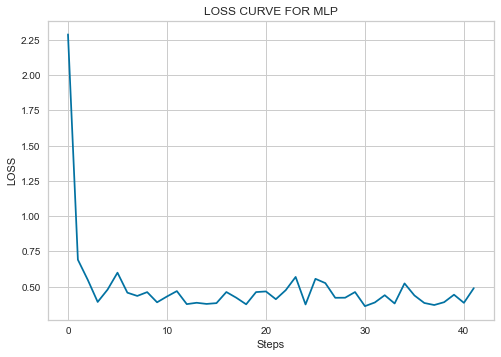

In [149]:
test_acc = metrics.precision_score(X_test[target], y_pred) * 100.
loss_values = mlp.loss_curve_
print (loss_values)
plt.plot(loss_values)
plt.title("LOSS CURVE FOR %s" % 'MLP')
plt.xlabel("Steps"), plt.ylabel('LOSS'), plt.legend(loc="best")
plt.show()